In [ ]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle


iris = load_iris()


X = iris.data
print(X)

y = iris.target
print(y)


X_shuffled, y_shuffled = shuffle(X, y, random_state=0)

print("the number of features - ",X_shuffled.shape[1])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Round 1:
Local Model Accuracies: [0.9666666666666667, 0.9666666666666667, 0.7]
Local Model Weights (Softmax): [0.3615422663449222, 0.3615422663449222, 0.2769154673101555]
Global Model Accuracy: 0.9

Round 2:
Local Model Accuracies: [0.9666666666666667, 0.8666666666666667, 0.9666666666666667]
Local Model Weights (Softmax): [0.3442533457435726, 0.3114933085128547, 0.3442533457435726]
Global Model Accuracy: 0.8666666666666667

Round 3:
Local Model Accuracies: [0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Local Model Weights (Softmax): [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Global Model Accuracy: 0.9666666666666667

Round 4:
Local Model Accuracies: [0.7333333333333333, 0.9666666666666667, 0.9666666666666667]
Local Model Weights (Softmax): [0.28363928712832803, 0.35818035643583596, 0.35818035643583596]
Global Model Accuracy: 0.9666666666666667

Round 5:
Local Model Accuracies: [0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Local Model Weigh

Round 10:
Local Model Accuracies: [0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Local Model Weights (Softmax): [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Global Model Accuracy: 0.9666666666666667



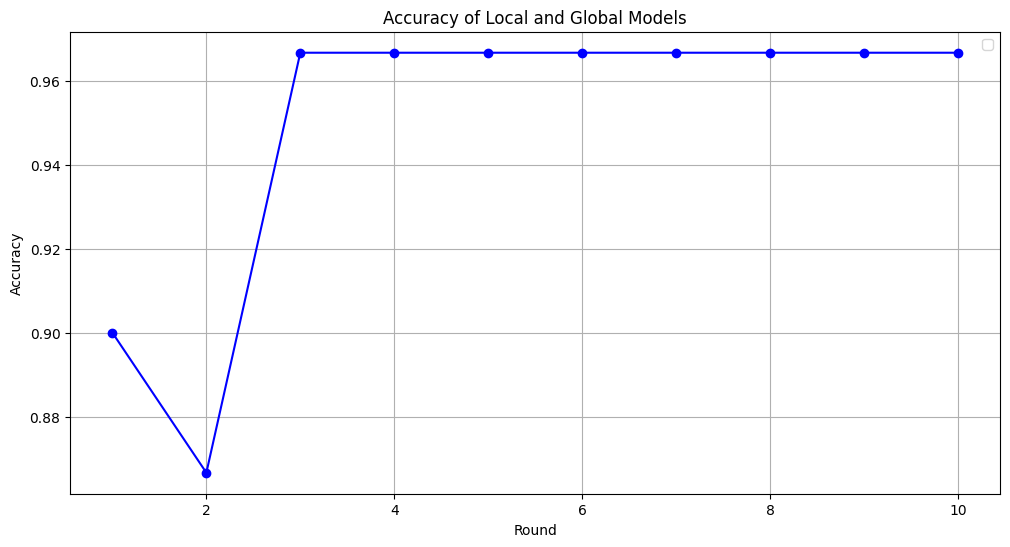

In [ ]:
# federated learning using a simple neural network model
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def mean_diff_softmax(arr):
    # Calculate the variance of each column
    column_mean = np.mean(arr, axis=0)
    print(column_mean)
    zeros_arr = np.zeros_like(arr, dtype = float)

    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            x = np.abs(arr[i, j] - column_mean[j])
            # print(x)
            zeros_arr[i, j] = x

    exp_arr = np.exp(zeros_arr)
    sum_exp_arr = np.sum(exp_arr, axis=0)
    softmax_arr = exp_arr / sum_exp_arr
    return softmax_arr

# Define the model architecture
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(4, 100)
        self.fc2 = nn.Linear(100, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

iterations = 50
global_acc_all = np.zeros(iterations, dtype=object)

for iter in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
    X_client1, X_client2, X_client3 = torch.tensor(X_train[:50], dtype=torch.float32), torch.tensor(X_train[50:100], dtype=torch.float32), torch.tensor(X_train[100:], dtype=torch.float32)
    y_client1, y_client2, y_client3 = torch.tensor(y_train[:50]), torch.tensor(y_train[50:100]), torch.tensor(y_train[100:])

    # Convert data to PyTorch tensors
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    # Initialize the global model
    global_model = SimpleNet()

    # Define the optimizer and loss function
    optimizer = optim.SGD(global_model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    # Simulate federated learning
    num_epochs = 100
    num_rounds = 10
    num_clients = 3
    X_clients = [X_client1, X_client2, X_client3]
    y_clients = [y_client1, y_client2, y_client3]

    global_accuracies = []
    local_accuracies_all = [[] for _ in range(num_clients)]

    for round_num in range(num_rounds):
        local_models = []
        local_accuracies = []
        for client_id in range(num_clients):
            local_model = SimpleNet()
            local_model.load_state_dict(global_model.state_dict())  # Copy the global model's weights
            local_optimizer = optim.SGD(local_model.parameters(), lr=0.01)

            X_client = X_clients[client_id]
            y_client = y_clients[client_id]
            dataset = TensorDataset(X_client, y_client)
            train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

            for epoch in range(num_epochs):
                for batch_idx, (data, target) in enumerate(train_loader):
                    local_optimizer.zero_grad()
                    output = local_model(data)
                    loss = criterion(output, target)
                    loss.backward()
                    local_optimizer.step()

            # Calculate local model accuracy
            with torch.no_grad():
                y_pred = torch.argmax(local_model(X_test_tensor), dim=1)
                accuracy = accuracy_score(y_test_tensor, y_pred)
                local_accuracies.append(accuracy)
                local_accuracies_all[client_id].append(accuracy)

            # local_state_dict = local_model.state_dict()
            # for key, value in local_state_dict.items():
            #     print(f"Parameter: {key}, Shape: {value.shape}")
            local_models.append(local_model)

        # Calculate softmax of local accuracies as weights
        local_accuracies_tensor = torch.tensor(local_accuracies)
        local_acc_softmax = F.softmax(local_accuracies_tensor, dim=0)


        # Aggregate local models with weighted averaging to update the global model
        global_state_dict = global_model.state_dict()
        for i, local_model in enumerate(local_models):
            local_state_dict = local_model.state_dict()
            for key_id, key in enumerate(global_state_dict.keys()):
                # print(local_state_dict[key])
                # global_state_dict[key] += local_state_dict[key] * local_acc_softmax[i]
                global_state_dict[key] += local_state_dict[key] / num_clients
        global_model.load_state_dict(global_state_dict)




        # global_state_dict = global_model.state_dict()
        # mean_state_dict = {}
        # for key in global_state_dict.keys():
        #     mean_state_dict[key] = sum(local_model.state_dict()[key] for local_model in local_models) / num_clients

        # for key in global_state_dict.keys():
        #     values = torch.stack([local_model.state_dict()[key] - mean_state_dict[key] for local_model in local_models])
        #     softmax_values = F.softmax(-values, dim=0)
        #     # print(softmax_values)
        #     for i, local_model in enumerate(local_models):
        #         global_state_dict[key] += (local_model.state_dict()[key]) * softmax_values[i]
        # global_model.load_state_dict(global_state_dict)




        # Calculate global model accuracy
        with torch.no_grad():
            y_pred = torch.argmax(global_model(X_test_tensor), dim=1)
            global_accuracy = accuracy_score(y_test_tensor, y_pred)
            global_accuracies.append(global_accuracy)

        print(f"Round {round_num + 1}")
        # print("Local Model Accuracies:", local_accuracies)
        # # print("Local Model Weights (Softmax):", local_acc_softmax.tolist())
        # print("Global Model Accuracy:", global_accuracy)
        # print()

    # # Plotting
    # arr=['rs-', 'ks-', 'gs-']
    # plt.figure(figsize=(12, 6))
    # # for client_id, local_accuracies in enumerate(local_accuracies_all):
    # #     plt.plot(range(1,6), local_accuracies, arr[client_id])
    # plt.plot(range(1,6), global_accuracies, 'bo-')
    # plt.xlabel('Round')
    # plt.ylabel('Accuracy')
    # plt.title('Accuracy of Local and Global Models')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    global_acc_all[iter] = np.array(global_accuracies)

Average of each column: [0.9        0.86666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667]


Text(0.5, 1.0, 'Accuracy of Local and Global Models')

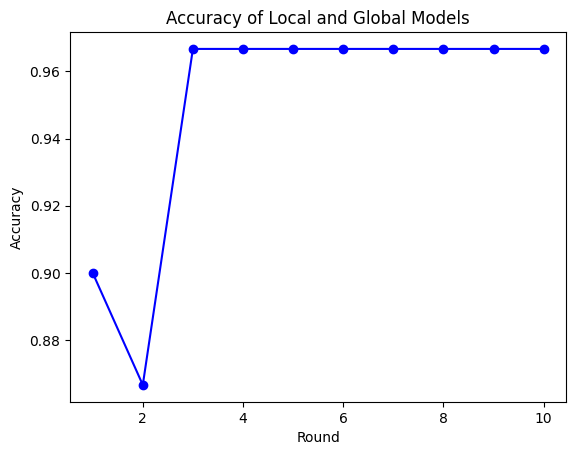

In [ ]:
import numpy as np

# Assuming arr is your 2D array
arr = np.array([global_acc_all])

# Calculate the average of each column
column_averages = np.mean(global_acc_all, axis=0)

print("Average of each column:", column_averages)

plt.plot(range(1,11), global_accuracies, 'bo-')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Accuracy of Local and Global Models')